# Classification

## problem definition
- predict if a patient will suffer with heart disease

### import required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### load the data

In [3]:
df = pd.read_csv('heart_disease.csv')
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


### exploratory data analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
# check if the data is imbalanced
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [8]:
df.cov()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,82.484558,-0.416661,-0.643499,44.495902,100.585076,0.392433,-0.555013,-82.903318,0.413022,2.214583,-0.944791,2.566356,0.378139,-1.021343
sex,-0.416661,0.217166,-0.023736,-0.463970,-4.780309,0.007475,-0.014261,-0.469871,0.031014,0.051993,-0.008819,0.056357,0.059930,-0.065307
cp,-0.643499,-0.023736,1.065132,0.861714,-4.113774,0.034719,0.024108,6.991618,-0.191168,-0.178821,0.076137,-0.191080,-0.102201,0.223330
trestbps,44.495902,-0.463970,0.861714,307.586453,111.967215,1.109042,-1.052324,-18.759131,0.557111,3.934486,-1.312832,1.818373,0.668022,-1.267950
chol,100.585076,-4.780309,-4.113774,111.967215,2686.426748,0.245427,-4.116703,-11.800494,1.631991,3.246794,-0.128964,3.737252,3.135488,-2.203855
fbs,0.392433,0.007475,0.034719,1.109042,0.245427,0.126877,-0.015769,-0.069897,0.004295,0.002377,-0.013147,0.050259,-0.006983,-0.004983
restecg,-0.555013,-0.014261,0.024108,-1.052324,-4.116703,-0.015769,0.276528,0.531462,-0.017474,-0.035883,0.030151,-0.038741,-0.003858,0.035998
thalach,-82.903318,-0.469871,6.991618,-18.759131,-11.800494,-0.069897,0.531462,524.646406,-4.076290,-9.153518,5.459369,-4.993235,-1.352491,4.818766
exang,0.413022,0.031014,-0.191168,0.557111,1.631991,0.004295,-0.017474,-4.076290,0.220707,0.157216,-0.074618,0.055603,0.059472,-0.102354
oldpeak,2.214583,0.051993,-0.178821,3.934486,3.246794,0.002377,-0.035883,-9.153518,0.157216,1.348095,-0.413219,0.264396,0.149462,-0.249452


In [9]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [10]:
len(df.columns)

14

In [27]:
# get all the relationships
correlation = df.corr()['target']

# remove the target column as it is 1.0
del correlation['target']

In [33]:
# get all absolute relationship magnitude
values = []
for value in correlation.values:
    values.append(abs(value))
values

[0.22543871587483835,
 0.2809365755017669,
 0.4337982615068947,
 0.14493112849775006,
 0.08523910513756902,
 0.028045760272713008,
 0.1372295028737731,
 0.4217409338106743,
 0.4367570833533032,
 0.4306960016873686,
 0.3458770782417246,
 0.3917239923512525,
 0.34402926803831]

In [36]:
# find the min and max values
max = np.max(values)
min = np.min(values)
average_correlation = np.mean([min, max])
print(f"max = {max}, min = {min}, average = {average_correlation}")

max = 0.4367570833533032, min = 0.028045760272713008, average = 0.2324014218130081


In [39]:
correlation.index

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [40]:
correlation.values

array([-0.22543872, -0.28093658,  0.43379826, -0.14493113, -0.08523911,
       -0.02804576,  0.1372295 ,  0.42174093, -0.43675708, -0.430696  ,
        0.34587708, -0.39172399, -0.34402927])

In [43]:
# find the columns having correlation > average_correlation
columns = []
for index in range(len(correlation.values)):
    if abs(correlation.values[index]) >= average_correlation:
        columns.append(correlation.index[index])
columns

['sex', 'cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

### pre-processing

In [44]:
# split the data into x and y

# select all the columns we have already found earlier with better correlation than average
x = df[columns]
y = df['target']

In [61]:
x

,sex,cp,thalach,exang,oldpeak,slope,ca,thal
0,1,3,150,0,2.3,0,0,1
1,1,2,187,0,3.5,0,0,2
2,0,1,172,0,1.4,2,0,2
3,1,1,178,0,0.8,2,0,2
4,0,0,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...
298,0,0,123,1,0.2,1,0,3
299,1,3,132,0,1.2,1,0,3
300,1,0,141,0,3.4,1,2,3
301,1,0,115,1,1.2,1,1,3


### train the models

#### Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression

def create_logistic_regression_model():
    
    # create the model
    model = LogisticRegression(max_iter=1000)

    # train the model
    model.fit(x_train, y_train)

    return model

#### Naive Bayes

In [51]:
from sklearn.naive_bayes import GaussianNB

def create_naive_bayes_model():

    # create the model
    model = GaussianNB()

    # train the model
    model.fit(x_train, y_train)

    return model

#### KNN

In [100]:
from sklearn.neighbors import KNeighborsClassifier

def create_knn_model():

    # create the model
    model = KNeighborsClassifier(n_neighbors=5)

    # train the model
    model.fit(x_train, y_train)

    return model

### model evaluation

In [101]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_model(model_name, model):
    
    # get the predictions using model
    y_pred = model.predict(x_test)
    y_true = y_test

    print(confusion_matrix(y_true, y_pred))
    
    # get the accuracy
    accuracy = accuracy_score(y_true, y_pred)

    # get the precision
    precision = precision_score(y_true, y_pred)

    # get the recall
    recall = recall_score(y_true, y_pred)

    # get f1 score
    f1 = f1_score(y_true, y_pred)

    # get roc score
    roc = roc_auc_score(y_true, y_pred)

    return model_name, accuracy, precision, recall, f1, roc    

In [102]:
# create Logistic regression model
model_lr = create_logistic_regression_model()

# create Naive Bayes model
model_nb = create_naive_bayes_model()

# create KNN model
model_knn = create_knn_model()

In [103]:
# evaluate all the models
model_evaluation_params = pd.DataFrame([
    evaluate_model("Logistic Regression", model_lr),
    evaluate_model("Naive Bayes", model_nb),
    evaluate_model('KNN', model_knn)
], columns=["Model Name", "Accuracy", "Precision", "Recall", "F1 Score", "RoC AuC Score"])

[[34 12]
 [ 1 44]]
[[36 10]
 [ 3 42]]
[[29 17]
 [ 6 39]]


In [104]:
# performance chart
model_evaluation_params

,Model Name,Accuracy,Precision,Recall,F1 Score,RoC AuC Score
0,Logistic Regression,0.857143,0.785714,0.977778,0.871287,0.858454
1,Naive Bayes,0.857143,0.807692,0.933333,0.865979,0.857971
2,KNN,0.747253,0.696429,0.866667,0.772277,0.748551


### result visualization

In [67]:
def visualize_model(model_name, model):
    
    # get the predictions
    y_pred = model.predict(x_test)

    plt.scatter(
            x_test['thalach'][y_pred == 0], 
            x_test['oldpeak'][y_pred == 0], 
            color="green",
            label="Patient Wont suffer")

    plt.scatter(
            x_test['thalach'][y_pred == 1], 
            x_test['oldpeak'][y_pred == 1], 
            color="red",
            label="Patient will suffer")
    
    plt.legend()
    plt.xlabel('thalach')
    plt.ylabel('oldpeak')
    plt.title(model_name)

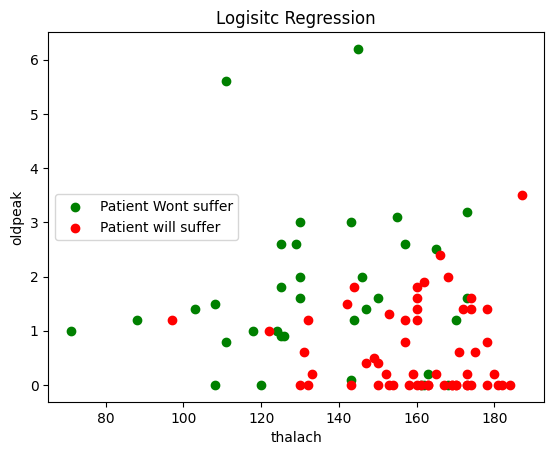

In [68]:
visualize_model("Logisitc Regression", model_lr)

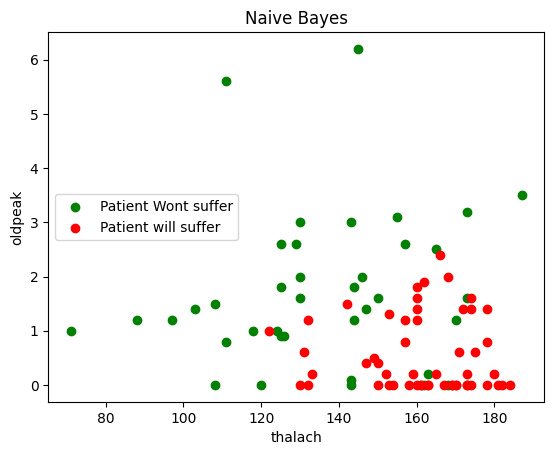

In [69]:
visualize_model("Naive Bayes", model_nb)

Text(0.5, 1.0, 'obsvered values')

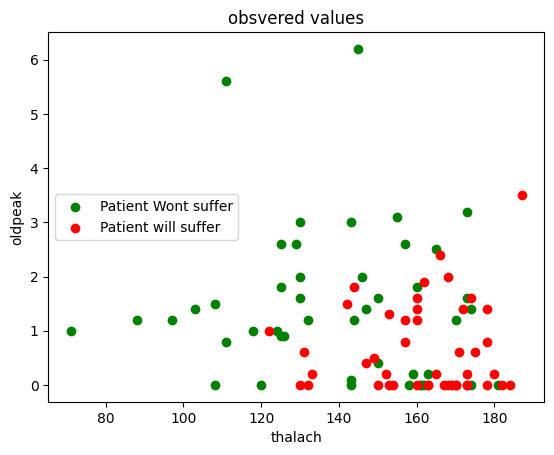

In [81]:
plt.scatter(
        x_test['thalach'][y_test == 0], 
        x_test['oldpeak'][y_test == 0], 
        color="green",
        label="Patient Wont suffer")

plt.scatter(
        x_test['thalach'][y_test == 1], 
        x_test['oldpeak'][y_test == 1], 
        color="red",
        label="Patient will suffer")

plt.legend()
plt.xlabel('thalach')
plt.ylabel('oldpeak')
plt.title('obsvered values')